In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io import gbq
from google.cloud import bigquery
from scipy.stats import t

In [2]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.summer_input_data.predictions_care_fera`
'''
project_id = 'berkeley-data-discovery-2023'
df = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)

In [3]:
df['predicted'] = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in df["predicted_income_range"]]

In [4]:
df

,TotalNetValue,avg_arrears,avg_month_bill,avg_monthly_kwh,c_day,c_max,c_min,c_total,c_weekday,c_weekend,...,opportunity_flag,p_city,per_id,predicted_income_range,s_diff,s_num_peaks,s_variance,care,fera,predicted
0,NaN,0.000000,317.501000,2559.221350,5.481956,14.2050,0.37400,3.745003,4.429056,2.050288,...,None,LIVERMORE,2636573761,"{'classes': ['low income', 'middle income', 'h...",0.623637,154,6.440896,False,None,high income
1,NaN,NaN,NaN,NaN,0.174538,1.6188,0.05350,0.192119,0.151542,0.293560,...,None,EMERYVILLE,9805999796,"{'classes': ['low income', 'middle income', 'h...",0.132971,35,0.059702,False,None,low income
2,345411.0,16.018341,3652.994889,37561.177778,55.704110,154.0800,0.00000,52.792326,55.970200,44.820268,...,Low Resource,OAKLAND,3168414054,"{'classes': ['low income', 'middle income', 'h...",7.610989,137,544.042056,False,None,low income
3,NaN,27.144500,102.397143,677.000000,1.183249,6.2598,0.08330,1.050921,1.070130,1.002716,...,None,OAKLAND,6143003260,"{'classes': ['low income', 'middle income', 'h...",0.252723,347,0.827384,False,None,low income
4,499178.0,0.000000,158.752698,1619.776984,3.280771,11.0000,0.36400,2.214290,2.648222,1.129082,...,Low Resource,OAKLAND,8505559142,"{'classes': ['low income', 'middle income', 'h...",0.327129,616,2.695432,False,None,high income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546237,654461.0,4.038783,35.586724,421.399086,0.638171,12.7469,0.00000,1.106143,1.162575,0.964220,...,Highest Resource,FREMONT,1971836241,"{'classes': ['low income', 'middle income', 'h...",0.565793,982,4.128367,False,None,high income
546238,682211.0,0.002087,112.739310,1286.875629,1.969720,10.4130,0.49500,1.762786,1.734400,1.833832,...,Highest Resource,FREMONT,2120424681,"{'classes': ['low income', 'middle income', 'h...",0.427613,1562,1.162914,True,None,high income
546239,1403683.0,0.052154,100.398125,734.382513,0.448895,8.4617,0.00000,0.614833,0.631880,0.563692,...,Highest Resource,FREMONT,7093934500,"{'classes': ['low income', 'middle income', 'h...",0.282259,15,1.738065,False,None,high income
546240,0.0,0.000000,51.203966,522.245364,0.711418,5.6582,0.08298,0.711970,0.719170,0.693943,...,Moderate Resource,OAKLAND,2191591057,"{'classes': ['low income', 'middle income', 'h...",0.144468,1225,0.213014,False,None,low income


In [5]:
df['predicted'].value_counts()

low income       352388
middle income    102203
high income       91651
Name: predicted, dtype: int64

In [6]:
low = df[df['predicted'] == 'low income']
mid = df[df['predicted'] == 'middle income']
high = df[df['predicted'] == 'high income']

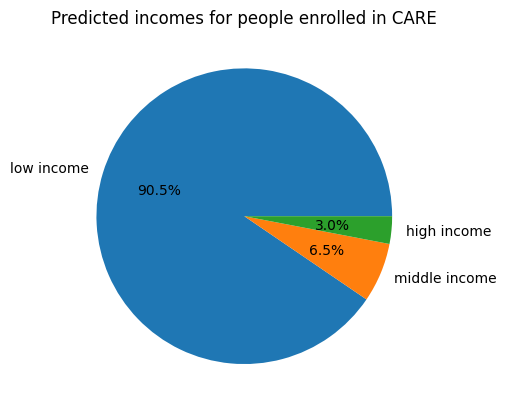

In [7]:
care = df[df['care'] == True]
yvals = list(care.value_counts('predicted'))
mylabels = ['low income', 'middle income', 'high income']
plt.pie(yvals, labels = mylabels, autopct='%1.1f%%')
plt.title('Predicted incomes for people enrolled in CARE')
plt.show() 

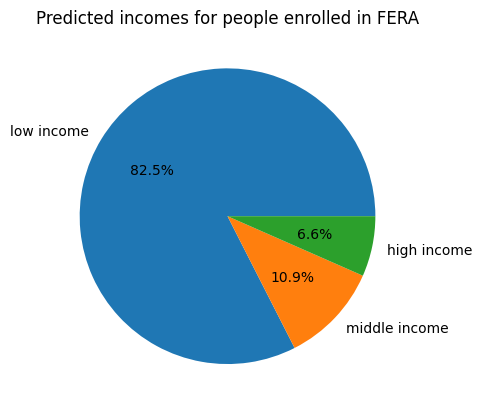

In [8]:
fera = df[df['fera'] == 'YES']
yvals = list(fera.value_counts('predicted'))
mylabels = ['low income', 'middle income', 'high income']
plt.pie(yvals, labels = mylabels, autopct='%1.1f%%')
plt.title('Predicted incomes for people enrolled in FERA')
plt.show() 

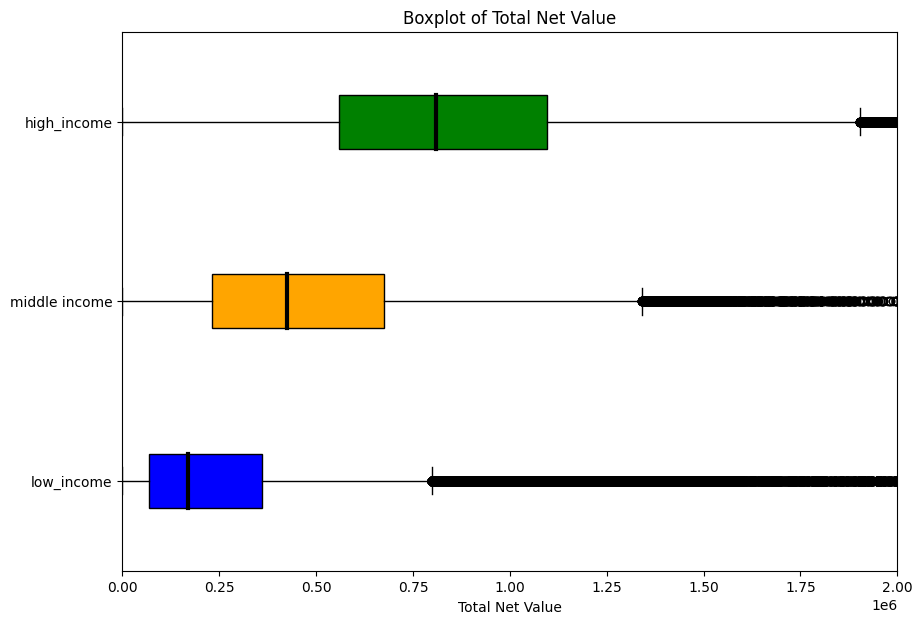

In [9]:
x1 = df[df['predicted'] == "low income"]['TotalNetValue']
x2 = df[df['predicted'] == "middle income"]['TotalNetValue']
x3 = df[df['predicted'] == "high income"]['TotalNetValue']

x1 = [x for x in x1 if x == x]
x2 = [x for x in x2 if x == x]
x3 = [x for x in x3 if x == x]

data = [x1, x2, x3]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True, vert = 0)
 
colors = ['blue', 'orange', 'green']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black', linewidth = 3)
     
# # x-axis labels
ax.set_yticklabels(['low_income', 'middle income', 'high_income'])
plt.xlabel('Total Net Value')
# # Adding title
plt.title("Boxplot of Total Net Value")
plt.xlim(0, 2000000)
plt.show()

In [10]:
cross_tab_prop = pd.crosstab(index=df['opportunity_flag'],
                             columns=df['predicted'],
                             normalize="index")
cross_tab_prop = cross_tab_prop.reindex(['High Segregation & Poverty', 'Low Resource', 'Moderate Resource', 'High Resource', 'Highest Resource'])
cross_tab_prop = cross_tab_prop.reindex(['low income', 'middle income', 'high income'], axis="columns")
cross_tab_prop

predicted,low income,middle income,high income
opportunity_flag,,,
High Segregation & Poverty,0.978280,0.021408,0.000313
Low Resource,0.954727,0.032178,0.013095
Moderate Resource,0.636009,0.257392,0.106598
High Resource,0.476316,0.300443,0.223242
Highest Resource,0.293145,0.212792,0.494062


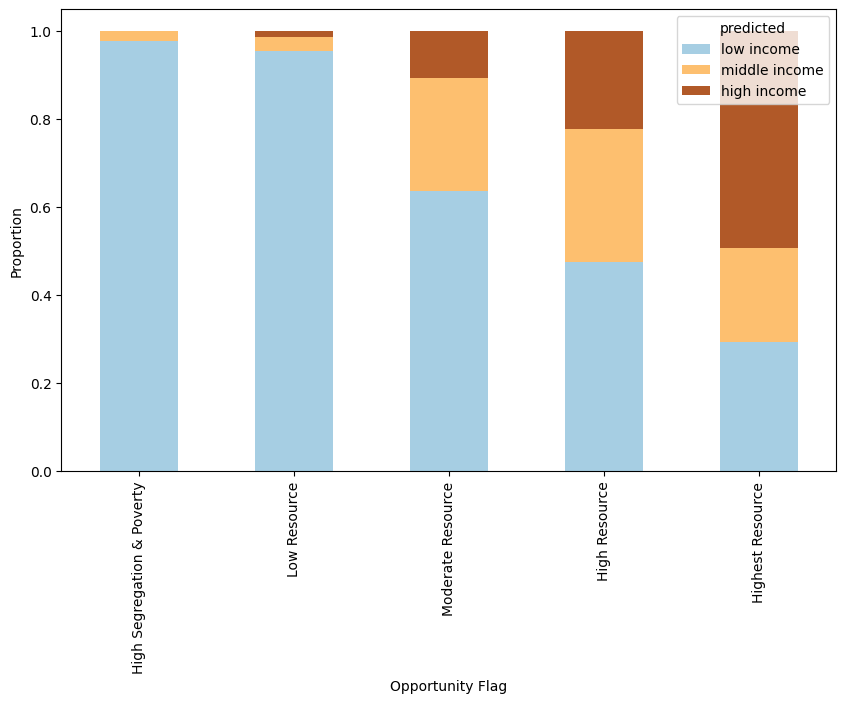

In [11]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6),
                    colormap= 'Paired')

plt.xlabel("Opportunity Flag")
plt.ylabel("Proportion")
plt.show()

[Text(0.5, 0, 'ces_score'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Amount of Pollution Burden')]

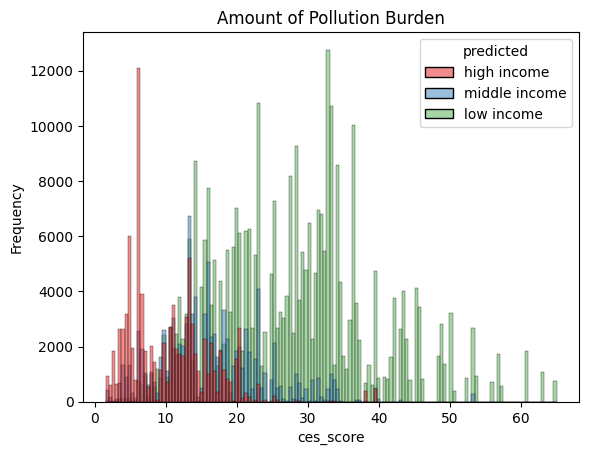

In [12]:
plt.rcdefaults()
hist = sns.histplot(data=df, x="ces_score", hue="predicted", palette="Set1", hue_order = ["high income", "middle income", "low income"])
hist.set(xlabel ="ces_score", ylabel = "Frequency", title ='Amount of Pollution Burden')

In [ ]:
plt.rcdefaults()
plt.xlim(0, 250)
hist = sns.histplot(data=df, x="avg_month_bill", hue="predicted", palette="Set1", hue_order = ["high income", "middle income", "low income"], binwidth=5)
hist.set(xlabel ="avg_month_bill", ylabel = "Frequency", title ='Average Monthly Bill')

In [ ]:
plt.rcdefaults()
plt.xlim(0, 2000000)
hist = sns.histplot(data=df, x="TotalNetValue", hue="predicted", palette="Set1", hue_order = ["high income", "middle income", "low income"], binwidth=25000)
hist.set(xlabel ="TotalNetValue", ylabel = "Frequency", title ='Property Value')

In [15]:
Query = '''
SELECT a.per_id, a.income_range, b.predicted_income_range
FROM `berkeley-data-discovery-2023.summer_input_data.training_data` a
JOIN `berkeley-data-discovery-2023.summer_input_data.predicted_income` b
ON a.per_id = CAST(b.per_id AS INT64)
'''
project_id = 'berkeley-data-discovery-2023'
actual = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)

In [16]:
actual['predicted'] = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in actual["predicted_income_range"]]

In [17]:
actual

,per_id,income_range,predicted_income_range,predicted
0,9978453720,low income,"{'classes': ['low income', 'middle income', 'h...",low income
1,2103415860,low income,"{'classes': ['low income', 'middle income', 'h...",low income
2,2229925154,low income,"{'classes': ['low income', 'middle income', 'h...",low income
3,2320375528,low income,"{'classes': ['low income', 'middle income', 'h...",low income
4,2127337439,low income,"{'classes': ['low income', 'middle income', 'h...",low income
...,...,...,...,...
295647,2004359130,middle income,"{'classes': ['low income', 'middle income', 'h...",low income
295648,5943346162,middle income,"{'classes': ['low income', 'middle income', 'h...",low income
295649,7019680021,middle income,"{'classes': ['low income', 'middle income', 'h...",low income
295650,7511549840,middle income,"{'classes': ['low income', 'middle income', 'h...",low income


In [ ]:
from sklearn import metrics
from tabulate import tabulate
true_labels = actual['income_range']
predicted_labels = actual['predicted']
confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels, labels=["low income", "middle income", "high income"])
print(confusion_matrix)
confusion_matrix_freq = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_freq)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_freq, display_labels = ["Low Income", "Middle Income", "High Income"])
cm_display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(true_labels, predicted_labels, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(true_labels, predicted_labels, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(true_labels, predicted_labels, average='weighted')
print('F1 score: %f' % f1)

low_precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0] + confusion_matrix[2][0])
mid_precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[2][1])
high_precision = confusion_matrix[2][2] / (confusion_matrix[0][2] + confusion_matrix[1][2] + confusion_matrix[2][2])

low_recall = confusion_matrix[0][0] / sum(confusion_matrix[0])
mid_recall = confusion_matrix[1][1] / sum(confusion_matrix[1])
high_recall = confusion_matrix[2][2] / sum(confusion_matrix[2])

low_f1_score = (2 * confusion_matrix[0][0]) / ((2*confusion_matrix[0][0]) + confusion_matrix[1][0] + confusion_matrix[2][0] + confusion_matrix[0][1] + confusion_matrix[0][2])
mid_f1_score = (2 * confusion_matrix[1][1]) / ((2*confusion_matrix[1][1]) + confusion_matrix[0][1] + confusion_matrix[2][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
high_f1_score = (2 * confusion_matrix[2][2]) / ((2*confusion_matrix[2][2]) + confusion_matrix[1][2] + confusion_matrix[0][2] + confusion_matrix[2][1] + confusion_matrix[2][0])

print(tabulate([['Low', low_precision, low_recall, low_f1_score], ['Middle', mid_precision, mid_recall, mid_f1_score], ['High', high_precision, high_recall, high_f1_score]], headers=['Class', 'Precision', 'Recall', 'F1 Score'], tablefmt='orgtbl'))

In [20]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.summer_input_data.predictions_care_fera`
WHERE CAST(per_id AS INT64) NOT IN(
  SELECT distinct per_id FROM `berkeley-data-discovery-2023.summer_input_data.training_data`
)
'''
project_id = 'berkeley-data-discovery-2023'
no_labels = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)

In [21]:
no_labels

,TotalNetValue,avg_arrears,avg_month_bill,avg_monthly_kwh,c_day,c_max,c_min,c_total,c_weekday,c_weekend,...,num_vehicles_owner_total,opportunity_flag,p_city,per_id,predicted_income_range,s_diff,s_num_peaks,s_variance,care,fera
0,NaN,0.000000,92.914032,1072.804768,2.329598,11.7250,0.21900,1.530248,1.976373,0.414604,...,10,None,LIVERMORE,5138430267,"{'classes': ['low income', 'middle income', 'h...",0.501284,2511,3.072944,False,None
1,913714.0,0.000000,114.413220,1309.206383,1.190459,7.5149,0.00000,1.387359,1.317836,1.561164,...,8,High Resource,FREMONT,9184781407,"{'classes': ['low income', 'middle income', 'h...",0.537235,171,1.749297,False,None
2,124097.0,0.896565,18.015789,180.502970,0.241927,1.4790,0.02600,0.232875,0.231933,0.235238,...,8,Low Resource,OAKLAND,2908476467,"{'classes': ['low income', 'middle income', 'h...",0.052903,1733,0.012290,False,None
3,952264.0,0.554130,143.069138,1469.196564,2.262612,12.9319,0.05851,2.098752,2.021135,2.293546,...,17,High Resource,LIVERMORE,2099618037,"{'classes': ['low income', 'middle income', 'h...",0.420111,797,1.676923,False,None
4,646907.5,0.840783,90.224386,973.315789,1.624213,8.9646,0.12913,1.346329,1.338158,1.366748,...,8,High Resource,LIVERMORE,2985830977,"{'classes': ['low income', 'middle income', 'h...",0.367312,2439,1.146924,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250585,468363.0,4.045174,79.280175,794.793105,1.119430,6.6130,0.02064,1.117734,1.118126,1.116753,...,7,High Segregation & Poverty,OAKLAND,2472725947,"{'classes': ['low income', 'middle income', 'h...",0.325077,2119,0.821016,False,None
250586,566134.0,0.000000,46.530000,314.370050,0.838132,4.7038,0.26283,0.790164,0.766682,0.847016,...,7,High Resource,FREMONT,3446503008,"{'classes': ['low income', 'middle income', 'h...",0.190601,168,0.356503,True,None
250587,123481.0,0.000000,52.189655,555.425707,0.734238,6.9340,0.01722,0.709015,0.697245,0.738449,...,7,Low Resource,SAN LORENZO,2004383316,"{'classes': ['low income', 'middle income', 'h...",0.280059,2848,0.453777,False,None
250588,180158.6,0.232261,28.442759,312.082272,0.481807,4.7150,0.05390,0.404047,0.426125,0.348900,...,7,Low Resource,HAYWARD,3220252831,"{'classes': ['low income', 'middle income', 'h...",0.207737,3606,0.196228,False,None


In [22]:
no_labels['predicted'] = [x.get("classes")[np.where(x.get("scores") == (max(x.get("scores"))))][0] for x in no_labels["predicted_income_range"]]

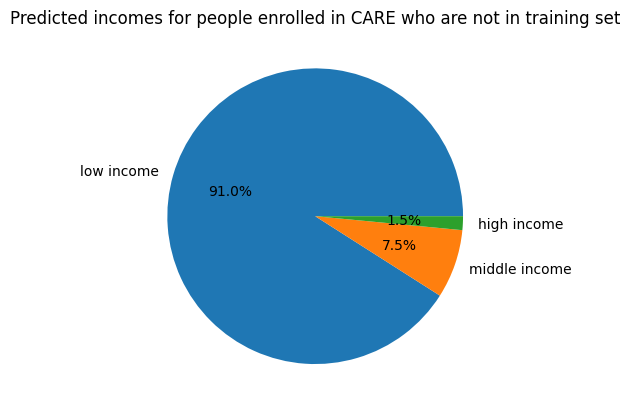

In [25]:
care = no_labels[no_labels['care'] == True]
yvals = list(care.value_counts('predicted'))
mylabels = ['low income', 'middle income', 'high income']
plt.pie(yvals, labels = mylabels, autopct='%1.1f%%')
plt.title('Predicted incomes for people enrolled in CARE who are not in training set')
plt.show() 

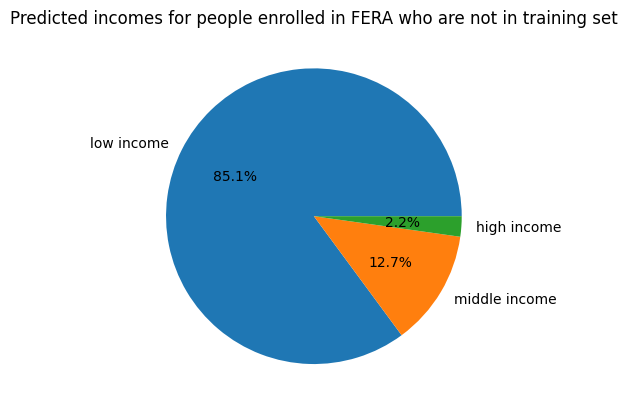

In [26]:
fera = no_labels[no_labels['fera'] == 'YES']
yvals = list(fera.value_counts('predicted'))
mylabels = ['low income', 'middle income', 'high income']
plt.pie(yvals, labels = mylabels, autopct='%1.1f%%')
plt.title('Predicted incomes for people enrolled in FERA who are not in training set')
plt.show() 